In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('data7_data3.npy')
re_data = data.reshape(-1,100*100)
re_data.shape

(300, 10000)

In [2]:
from sklearn.decomposition import PCA #decomposition.PCA 주성분분석
pca = PCA(n_components=50)
pca.fit(re_data)
rr_data = pca.fit_transform(re_data)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
def f(data,r=1):
    n=len(data)
    rows=int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig,axs = plt.subplots(rows,cols,figsize = (cols*r,rows*r))
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(data[i*10+j],cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()

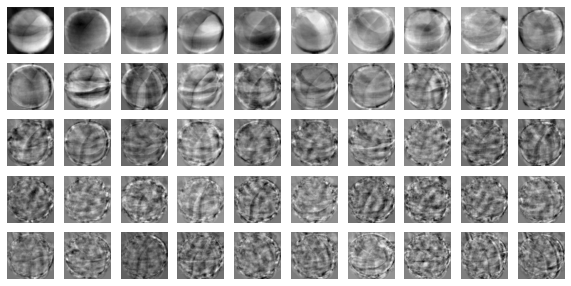

In [5]:
f(pca.components_.reshape(-1,100,100))

In [6]:
rr_data.shape

(300, 50)

In [12]:
k = pca.inverse_transform(rr_data).shape
k

(300, 10000)

In [8]:
np.sum(pca.explained_variance_ratio_)

0.9215970593628037

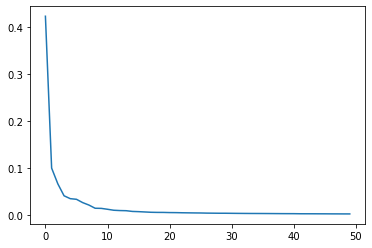

In [9]:
plt.plot(pca.explained_variance_ratio_)

In [10]:
y = np.array([0]*100+[1]*100+[2]*100)
x=rr_data

In [11]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
from sklearn.model_selection import cross_validate
sc = cross_validate(m,x,y,cv=5)
print(np.mean(sc['test_score']))
print(np.mean(sc['fit_time']))
sc = cross_validate(m,re_data,y,cv=5)
print(np.mean(sc['test_score']))
print(np.mean(sc['fit_time']))

1.0
0.029720306396484375
0.9966666666666667
0.452589750289917
